## Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


## Loading Data

In [84]:
df=pd.read_csv('../input/covid19-indonesia/covid_19_indonesia_time_series_all.csv')
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


## Explore and Clean

In [85]:
df.shape

(31822, 38)

In [86]:
df.nunique() 

Date                             930
Location ISO Code                 35
Location                          35
New Cases                       2591
New Deaths                       405
New Recovered                   2541
New Active Cases                2562
Total Cases                    22951
Total Deaths                    6419
Total Recovered                21124
Total Active Cases              8412
Location Level                     2
City or Regency                    0
Province                          34
Country                            1
Continent                          1
Island                             7
Time Zone                          3
Special Status                     3
Total Regencies                   18
Total Cities                      10
Total Districts                   35
Total Urban Villages              33
Total Rural Villages              34
Area (km2)                        35
Population                        35
Population Density                35
L

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

After looking in info of data we noticed that:
- We have a many null values in column 'Province/State', so let's drop it.
- 'Date' column is object! we should convert it into datetime


In [88]:
df.drop(df.columns[[12,18]], axis=1, inplace = True)
df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.00,1.00
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00


In [89]:
df.drop(range(0,22794), inplace = True)
df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
22794,1/1/2022,ID-BA,Bali,3,0,0,3,114392,4061,110273,...,-8.369472,0.71,27131.73,0.0,963.20,96.32,3.55%,96.40%,1.00,0.00
22795,1/1/2022,ID-BT,Banten,8,0,5,3,132834,2694,130133,...,-6.456736,0.75,12388.49,0.0,251.25,25.13,2.03%,97.97%,2.00,1.00
22796,1/1/2022,ID-BE,Bengkulu,0,0,0,0,23105,473,22631,...,-3.533584,0.00,11555.16,0.0,236.55,23.66,2.05%,97.95%,1.00,1.00
22797,1/1/2022,ID-JK,DKI Jakarta,118,0,46,72,865415,13609,851282,...,-6.204699,10.88,79790.10,0.0,1254.73,125.47,1.57%,98.37%,1.36,0.00
22798,1/1/2022,ID-YO,Daerah Istimewa Yogyakarta,7,0,7,0,157004,5269,151631,...,-7.894502,1.93,43239.70,0.0,1451.11,145.11,3.36%,96.58%,1.17,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00


In [90]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
22794,2022-01-01,ID-BA,Bali,3,0,0,3,114392,4061,110273,...,-8.369472,0.71,27131.73,0.0,963.20,96.32,3.55%,96.40%,1.00,0.00
22795,2022-01-01,ID-BT,Banten,8,0,5,3,132834,2694,130133,...,-6.456736,0.75,12388.49,0.0,251.25,25.13,2.03%,97.97%,2.00,1.00
22796,2022-01-01,ID-BE,Bengkulu,0,0,0,0,23105,473,22631,...,-3.533584,0.00,11555.16,0.0,236.55,23.66,2.05%,97.95%,1.00,1.00
22797,2022-01-01,ID-JK,DKI Jakarta,118,0,46,72,865415,13609,851282,...,-6.204699,10.88,79790.10,0.0,1254.73,125.47,1.57%,98.37%,1.36,0.00
22798,2022-01-01,ID-YO,Daerah Istimewa Yogyakarta,7,0,7,0,157004,5269,151631,...,-7.894502,1.93,43239.70,0.0,1451.11,145.11,3.36%,96.58%,1.17,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,2022-09-15,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,2022-09-15,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,2022-09-15,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,2022-09-15,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00


we don't need the duplicated dates, so we creat a new dataframe with a unique dates

In [91]:
df_uni=df.groupby(['Date'])['Total Cases','Total Deaths','Total Recovered','Total Active Cases'].sum().reset_index()
df_uni

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Date,Total Cases,Total Deaths,Total Recovered,Total Active Cases
0,2022-01-01,8487535,286242,8193033,8260
1,2022-01-02,8526314,288310,8229777,8227
2,2022-01-03,8526844,288321,8230001,8522
3,2022-01-04,8527443,288327,8230339,8777
4,2022-01-05,8528252,288333,8230699,9220
...,...,...,...,...,...
254,2022-09-12,12786964,315669,12408267,63028
255,2022-09-13,12790051,315693,12412476,61882
256,2022-09-14,12794750,315720,12416777,62253
257,2022-09-15,12770491,314861,12392302,63328


In [92]:
df_uni.isnull().sum()

Date                  0
Total Cases           0
Total Deaths          0
Total Recovered       0
Total Active Cases    0
dtype: int64

## Apply Prophet

Let's Apply Prophet, you can read more about it and how to use in this link: https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

In [93]:
!pip install fbprophet

In [94]:
from fbprophet import Prophet
pro = Prophet()

In Prophet: 
- The DataFrame must have a specific format. The first column must have the name ‘ds‘ and contain the date-times. The second column must have the name ‘y‘ and contain the observations.

In [95]:
df_uni.rename(columns={'Date':'ds','Total Cases':'y'}, inplace = True)
df_uni

,ds,y,Total Deaths,Total Recovered,Total Active Cases
0,2022-01-01,8487535,286242,8193033,8260
1,2022-01-02,8526314,288310,8229777,8227
2,2022-01-03,8526844,288321,8230001,8522
3,2022-01-04,8527443,288327,8230339,8777
4,2022-01-05,8528252,288333,8230699,9220
...,...,...,...,...,...
254,2022-09-12,12786964,315669,12408267,63028
255,2022-09-13,12790051,315693,12412476,61882
256,2022-09-14,12794750,315720,12416777,62253
257,2022-09-15,12770491,314861,12392302,63328


In [96]:
model=pro.fit(df_uni)
model.seasonalities

Initial log joint probability = -17.801
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       713.233   0.000630693       73.7329           1           1      141   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       719.576    0.00018518       75.2757           1           1      274   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       719.762   0.000108812       66.2907   1.998e-06       0.001      339  LS failed, Hessian reset 
     288       719.788   5.61819e-08         64.33      0.1548           1      450   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

- now we will do forecasting so, to do this we need some Future Days: https://www.rdocumentation.org/packages/prophet/versions/1.0/topics/make_future_dataframe

In [97]:
future_days=model.make_future_dataframe(periods=30,freq='D')
future_days.head()

,ds
0,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04
4,2022-01-05


In [98]:
pred=model.predict(future_days)

pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,8.159556e+06,7.655051e+06,8.740686e+06,8.159556e+06,8.159556e+06,28041.668870,28041.668870,28041.668870,28041.668870,28041.668870,28041.668870,0.0,0.0,0.0,8.187597e+06
1,2022-01-02,8.185047e+06,7.708237e+06,8.762489e+06,8.185047e+06,8.185047e+06,26835.671998,26835.671998,26835.671998,26835.671998,26835.671998,26835.671998,0.0,0.0,0.0,8.211883e+06
2,2022-01-03,8.210539e+06,7.714597e+06,8.735237e+06,8.210539e+06,8.210539e+06,21522.868481,21522.868481,21522.868481,21522.868481,21522.868481,21522.868481,0.0,0.0,0.0,8.232062e+06
3,2022-01-04,8.236030e+06,7.725277e+06,8.766565e+06,8.236030e+06,8.236030e+06,21560.486140,21560.486140,21560.486140,21560.486140,21560.486140,21560.486140,0.0,0.0,0.0,8.257591e+06
4,2022-01-05,8.261522e+06,7.762538e+06,8.826711e+06,8.261522e+06,8.261522e+06,23980.156688,23980.156688,23980.156688,23980.156688,23980.156688,23980.156688,0.0,0.0,0.0,8.285502e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2022-10-12,1.259273e+07,1.207513e+07,1.317078e+07,1.246545e+07,1.274217e+07,23980.156688,23980.156688,23980.156688,23980.156688,23980.156688,23980.156688,0.0,0.0,0.0,1.261671e+07
285,2022-10-13,1.259580e+07,1.209649e+07,1.316639e+07,1.246168e+07,1.275179e+07,24921.383263,24921.383263,24921.383263,24921.383263,24921.383263,24921.383263,0.0,0.0,0.0,1.262072e+07
286,2022-10-14,1.259887e+07,1.185941e+07,1.302330e+07,1.245515e+07,1.276134e+07,-146862.235440,-146862.235440,-146862.235440,-146862.235440,-146862.235440,-146862.235440,0.0,0.0,0.0,1.245201e+07
287,2022-10-15,1.260195e+07,1.205549e+07,1.322703e+07,1.245269e+07,1.277245e+07,28041.668869,28041.668869,28041.668869,28041.668869,28041.668869,28041.668869,0.0,0.0,0.0,1.262999e+07


## Visualization the prediction

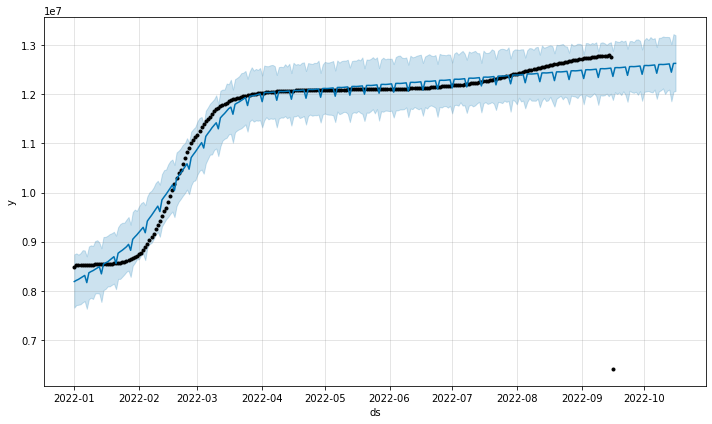

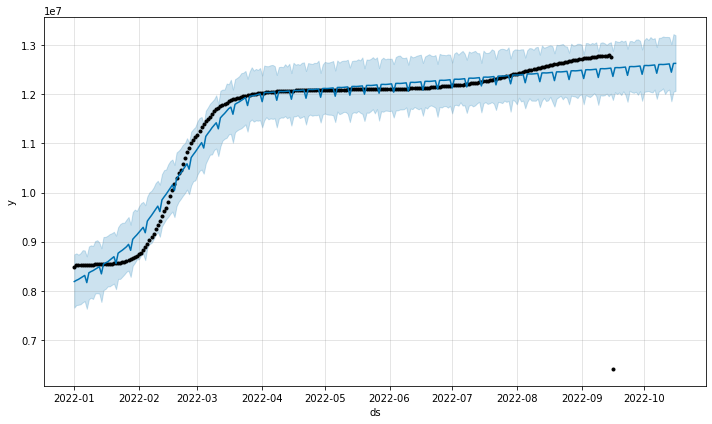

In [99]:
model.plot(pred)

- A dark blue light over here which represent the predicted values, whereas the black dots are exactly my actual data.
- Range in above is  my future data.

### Let's visualize Each Components[Trends,Weekly]

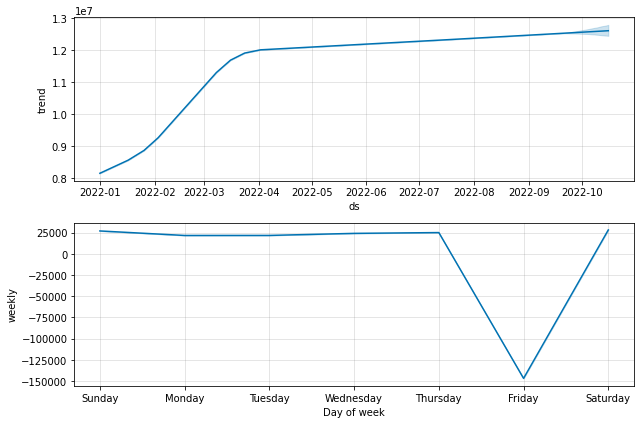

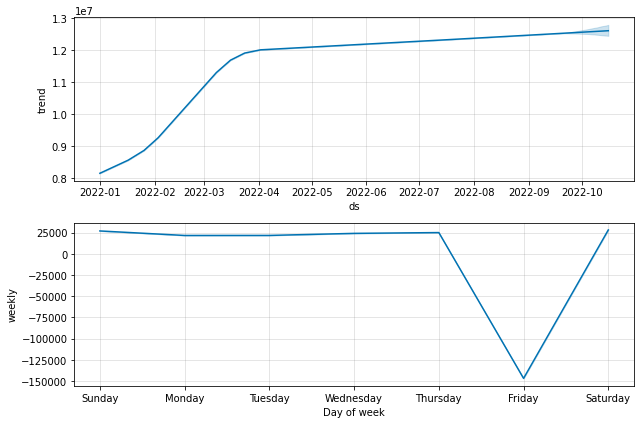

In [100]:
model.plot_components(pred)

Making 5 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00

In [101]:
from fbprophet.diagnostics import cross_validation
cv=cross_validation(model ,horizon='30 days',period='15 days',initial='90 days')


  0%|          | 0/10 [00:00<?, ?it/s]


Initial log joint probability = -55.5313
Iteration  1. Log joint probability =    132.606. Improved by 188.138.
Iteration  2. Log joint probability =     155.04. Improved by 22.4336.
Iteration  3. Log joint probability =    264.668. Improved by 109.628.
Iteration  4. Log joint probability =    264.715. Improved by 0.0473229.
Iteration  5. Log joint probability =    264.769. Improved by 0.0536803.
Iteration  6. Log joint probability =    264.826. Improved by 0.0573972.
Iteration  7. Log joint probability =    264.935. Improved by 0.10925.
Iteration  8. Log joint probability =    265.195. Improved by 0.259459.
Iteration  9. Log joint probability =    265.243. Improved by 0.0480015.
Iteration 10. Log joint probability =    265.786. Improved by 0.542815.
Iteration 11. Log joint probability =    265.875. Improved by 0.0891061.
Iteration 12. Log joint probability =    266.262. Improved by 0.387413.
Iteration 13. Log joint probability =     266.33. Improved by 0.0682705.
Iteration 14. Log jo

In [102]:
cv


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-04-05,1.206866e+07,1.205771e+07,1.207920e+07,12047828,2022-04-04
1,2022-04-06,1.208314e+07,1.206958e+07,1.209776e+07,12052628,2022-04-04
2,2022-04-07,1.209763e+07,1.208004e+07,1.211755e+07,12056806,2022-04-04
3,2022-04-08,1.210778e+07,1.208189e+07,1.214165e+07,12060316,2022-04-04
4,2022-04-09,1.211770e+07,1.207703e+07,1.216382e+07,12063252,2022-04-04
...,...,...,...,...,...,...
295,2022-09-12,1.281377e+07,1.244548e+07,1.319284e+07,12786964,2022-08-17
296,2022-09-13,1.282266e+07,1.242197e+07,1.323021e+07,12790051,2022-08-17
297,2022-09-14,1.283534e+07,1.241205e+07,1.327252e+07,12794750,2022-08-17
298,2022-09-15,1.284681e+07,1.239478e+07,1.331617e+07,12770491,2022-08-17


We compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE), Mean Absolute Percentage Error(MAPE).

/opt/conda/lib/python3.7/site-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/opt/conda/lib/python3.7/site-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


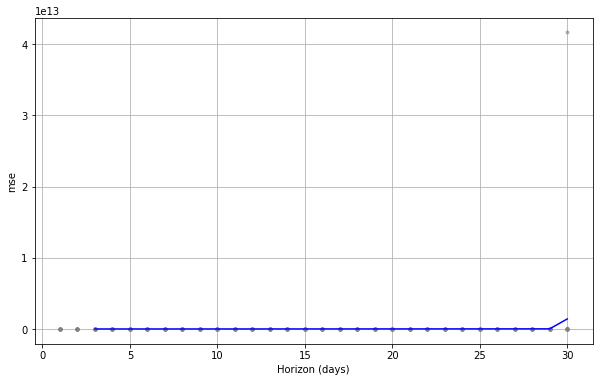

In [103]:
from fbprophet.plot import plot_cross_validation_metric
df_plot = plot_cross_validation_metric(cv,metric='mse')

/opt/conda/lib/python3.7/site-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/opt/conda/lib/python3.7/site-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


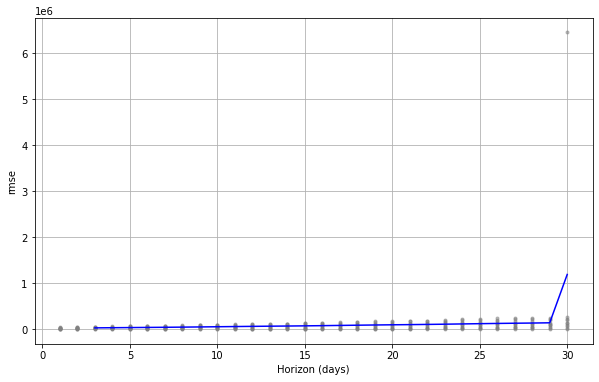

In [104]:
df_plot=plot_cross_validation_metric(cv,metric='rmse')

/opt/conda/lib/python3.7/site-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/opt/conda/lib/python3.7/site-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


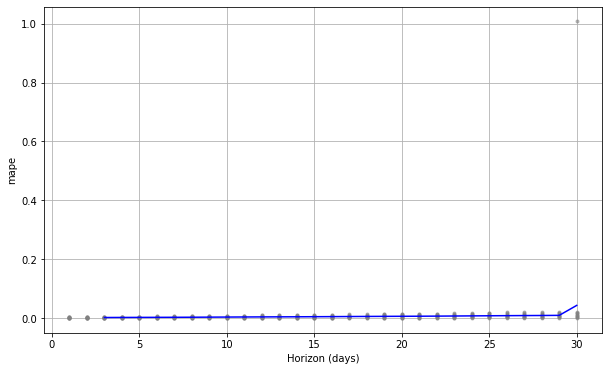

In [105]:
df_plot=plot_cross_validation_metric(cv,metric='mape')